# Statistical Mechanics-Spring 2020: Problem Set 1
### Gabriel Jurado

Consider Hamilton's equations of motion for a system of $N$ particles in three dimensions interacting via a Lennard-Jones potential: $$ H(\{\vec{p_i},\vec{r_i}\}) = \sum_{i=1}^N \dfrac{p_i^2}{2m}+\sum_{i<j}u(r_{ij})$$ $$ u(r)=-4\epsilon \Bigg(\Big(\dfrac{\sigma}{r} \Big)^6 -\Big(\dfrac{\sigma}{r} \Big)^{12}\Bigg)$$ where $r_{ij}=|\vec{r_i}-\vec{r_j}|$ and $\epsilon > 0$. We have used units of length, energy, and time, such that, $\sigma =1$, $\epsilon = 1$, and $m=1$. 

Using Hamilton's equations we obtain 
\begin{align}
\dot{\vec{r_i}}(t) & = \vec{p_i}(t), \\
\dot{\vec{p_i}}(t) & = - \sum_{j\neq i}\nabla_iu(r_{ij}) = \vec{F_i} 
\end{align}

The force at time $t$ is given by $$\vec{F_i}(t)=24\sum_{j\neq i}\vec{r_{ij}}\Big( \dfrac{2}{r_{ij}^{14}}-\dfrac{1}{r_{ij}^8}\Big)$$

The most trivial integration of the equations of motions yields the following set of equations:
\begin{align}
\vec{r_i}(n+1) & = \vec{r_i}(n)+\vec{p_i}(n)\Delta t \\
\vec{p_i}(n+1) & = \vec{r_i}(n)+\vec{F_i}(n)\Delta t
\end{align}
where we have used the notation $\vec{r_i}(n)$ for the position vector of the $i^{th}$ particle at time $t=n\Delta t$ and simiarly for the momentum and force. These equations can be iterated numerically to find $\vec{r_i}(t)$ and $\vec{p_i}(t)$ starting from a specified initial configuration in phase space $\{ \vec{r_i}(0),\vec{p_i}(0)\}$. 

1) ** Plot the Lennard-Jones potential**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.integrate import simps
from math import sqrt
from scipy.stats import norm

In [2]:
def L_J_Potential(x):
    return -4 * (1/x**6 - 1/x**12)

Text(0,0.5,'Lennard-Jones Potential')

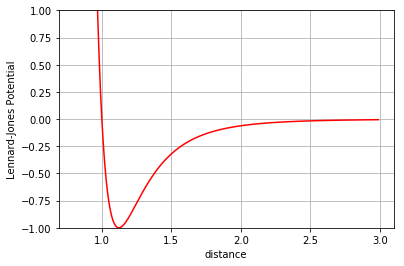

In [43]:
x = np.arange(0.8, 3, 0.01)

plt.figure()
plt.plot(x, L_J_Potential(x), 'r-')
plt.ylim(-1, 1)
plt.grid(True)
plt.xlabel('distance')
plt.ylabel('Lennard-Jones Potential')

2) **Use the attached data files containing the calculated average kinetic energy of the system and plot the kinetic energy, as a function of time, for different number of particles.**

In [4]:
#import the data files for N={32,64,128,256}

kin_32 = np.loadtxt('/home/gabriel/HW1/kin_32.dat')
kin_64 = np.loadtxt('/home/gabriel/HW1/kin_64.dat')
kin_128 = np.loadtxt('/home/gabriel/HW1/kin_128.dat')
kin_256 = np.loadtxt('/home/gabriel/HW1/kin_256.dat')

In the following plots the vertical red line indicates the approximate value of thermalization time: $T_{th}$

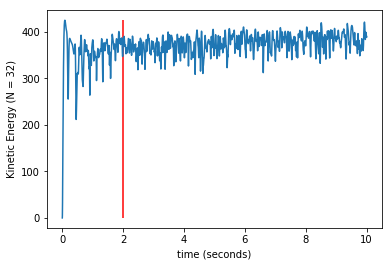

In [19]:
plt.plot(kin_32[:,0], kin_32[:,1])

plt.xlabel('time (seconds)')
plt.ylabel('Kinetic Energy (N = 32)')
plt.vlines([2], 0, 425, colors='r')

$T_{th} \approx 2s$ 

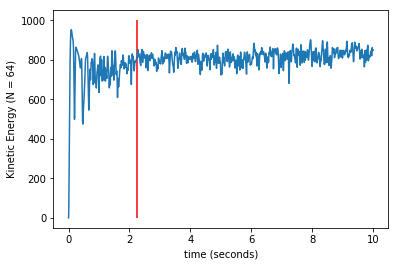

In [25]:
plt.plot(kin_64[:,0], kin_64[:,1])

plt.xlabel('time (seconds)')
plt.ylabel('Kinetic Energy (N = 64)')
plt.vlines([2.25], 0, 1000, colors='r')

$T_{th} \approx 2.25s$ 

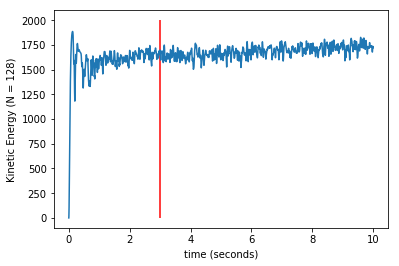

In [22]:
plt.plot(kin_128[:,0], kin_128[:,1])

plt.xlabel('time (seconds)')
plt.ylabel('Kinetic Energy (N = 128)')
plt.vlines([3], 0, 2000, colors='r')

$T_{th} \approx 3s$ 

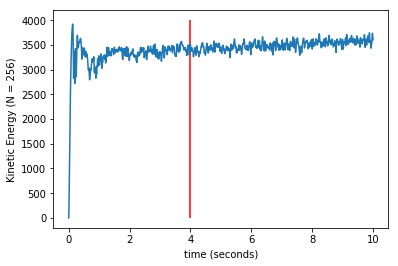

In [21]:
plt.plot(kin_256[:,0], kin_256[:,1])

plt.xlabel('time (seconds)')
plt.ylabel('Kinetic Energy (N = 256)')
plt.vlines([4], 0, 4000, colors='r')

$T_{th} \approx 4s$ 

Already from the plots we can begin to see the dependence of system size on the thermalization time. As the system size increase, i.e. $N\rightarrow \infty$, the relaxation time increases. 

3) **Using your results for $t>T_{th}$, calculate the time-average kinetic energy defined as** 
\begin{align}
\langle E_k \rangle & = \dfrac{1}{T-T_0}\int_{T_0}^{T}dtE_k(t) \\
E_k(t) & = \dfrac{1}{2}\sum_{i=1}^N \Big((p_i^x)^2+(p_i^y)^2+(p_i^z)^2 \Big)
\end{align}
**You are free to choose $T_0$ to be any intitial time instant after the system thermalizes using your observation in the previous step.**

We begin by choosing an initial time of $T_0=4$. Using Simpson's rule we can express the time-average kinetic energy into a sum of time-steps 
\begin{align}
\langle E_k \rangle & = \dfrac{1}{T-T_0}\int_{T_0}^{T}dtE_k(t) \\
\int_{T_0}^{T}dtE_k(t) & \approx \dfrac{\Delta t}{3}\Big(E_k(t_0)+4E_k(t_1)+2E_k(t_2)+\cdots +4E_k(t_{n-1})+E_k(t_n) \Big) \\
\implies \langle E_k \rangle & = \dfrac{1}{3n}\Big(E_k(t_0)+4E_k(t_1)+2E_k(t_2)+\cdots +4E_k(t_{n-1})+E_k(t_n) \Big) 
\end{align}
where 
\begin{align}
\Delta t & = \dfrac{T-T_0}{n} \\
t_i & =T_0+i\Delta t, \quad i=\{1,2,...,n\}
\end{align}

In [26]:
# Choose thermalization time
T_0 = 4

# Create a subset of the data that goes from T_0 ~= 4 to T ~= 10 for each data set
kin_32_subset = kin_32[kin_32[:,0] > T_0]
kin_64_subset = kin_64[kin_64[:,0] > T_0]
kin_128_subset = kin_128[kin_128[:,0] > T_0]
kin_256_subset = kin_256[kin_256[:,0] > T_0]

# Integragte the data subset
E_kin_32 = simps(kin_32_subset[:,1], kin_32_subset[:,0]) / (kin_32_subset[-1,0] - kin_32_subset[0,0])
E_kin_64 = simps(kin_64_subset[:,1], kin_64_subset[:,0]) / (kin_64_subset[-1,0] - kin_64_subset[0,0])
E_kin_128 = simps(kin_128_subset[:,1], kin_128_subset[:,0]) / (kin_128_subset[-1,0] - kin_128_subset[0,0])
E_kin_256 = simps(kin_256_subset[:,1], kin_256_subset[:,0]) / (kin_256_subset[-1,0] - kin_256_subset[0,0])

#Print out calculate average Kinetic Energy
print('E_kin_32  = ', E_kin_32)
print('E_kin_64  = ', E_kin_64)
print('E_kin_128 = ', E_kin_128)
print('E_kin_256 = ', E_kin_256)

E_kin_32  =  379.38225145200784
E_kin_64  =  818.2252725114897
E_kin_128 =  1696.2971543026722
E_kin_256 =  3498.5270525700116


4) **Show that the average kinetic energy scales linearly with $N$ using the results of your calculation for the four different values of $N$ you used above. Now plot the kinetic energy per particle on the same graph as function of time for different number of particles. This should show that the values of the kinetic energy, per particle, are not too different for different values of $N$.**
**What happens to the relative kinetic energy fluctuations when you plot your results of the kinetic energy per particle?**

To show the first part of the question we just have to plot $\langle E_k \rangle$ vs number of particles (N). 

Text(0,0.5,'Average Kinetic Energy')

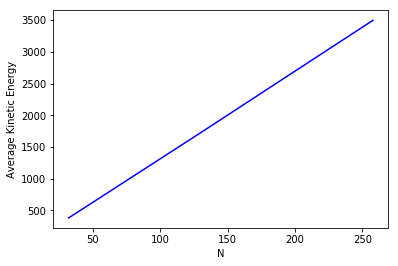

In [27]:
KEs = [E_kin_32, E_kin_64, E_kin_128, E_kin_256] # average kinetic energy
Ns  = [32, 64, 128, 258]

plt.plot(Ns, KEs, "b-")
plt.xlabel('N')
plt.ylabel('Average Kinetic Energy')

When we plot the kinetic energy **per particle** as a function of time we get the following

Text(0,0.5,'Kinetic Energy per particles')

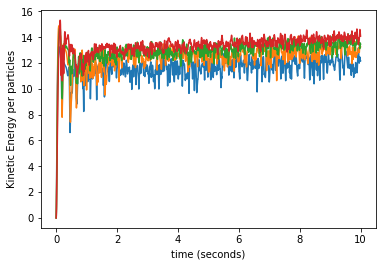

In [29]:
# Plot average kinetic energy per particle
plt.plot(kin_32[:,0], kin_32[:,1] / 32)
plt.plot(kin_64[:,0], kin_64[:,1] / 64)
plt.plot(kin_128[:,0], kin_128[:,1] / 128)
plt.plot(kin_256[:,0], kin_256[:,1] / 256)

plt.xlabel('time (seconds)')
plt.ylabel('Kinetic Energy per particles')

Blue: N=32, Orange: N=64, Green: N=128, Red: N=256

We see that as the average kinetic energy increases, the relative kinetic energy fluctuation decreases.

5) **Using your results calculate the variance of the kinetic energy, defined as**
\begin{align}
\Delta E_k & = \sqrt{\langle E_k^2\rangle-\langle E_k\rangle^2} \\
\langle E_k^2 \rangle & = \dfrac{1}{T-T_0}\int_{T_0}^TdTE_k^2(t)
\end{align}

We begin by calculating $\langle E_k^2 \rangle$, this requires us to square our energy values when performing our numerical integration. The rest of the calculation is plugging in our values for $\langle E_k^2 \rangle$ into the equation for $\Delta E_k$.

In [30]:
# Calculate <E^2>
E2_kin_32 = simps(kin_32_subset[:,1]*kin_32_subset[:,1], kin_32_subset[:,0]) / (kin_32_subset[-1,0] - kin_32_subset[0,0])
E2_kin_64 = simps(kin_64_subset[:,1]*kin_64_subset[:,1], kin_64_subset[:,0]) / (kin_64_subset[-1,0] - kin_64_subset[0,0])
E2_kin_128 = simps(kin_128_subset[:,1]*kin_128_subset[:,1], kin_128_subset[:,0]) / (kin_128_subset[-1,0] - kin_128_subset[0,0])
E2_kin_256 = simps(kin_256_subset[:,1]*kin_256_subset[:,1], kin_256_subset[:,0]) / (kin_256_subset[-1,0] - kin_256_subset[0,0])

#Calculate standard deviation
DE_kin_32  = sqrt(E2_kin_32 - E_kin_32*E_kin_32)
DE_kin_64  = sqrt(E2_kin_64 - E_kin_64*E_kin_64)
DE_kin_128 = sqrt(E2_kin_128 - E_kin_128*E_kin_128)
DE_kin_256 = sqrt(E2_kin_256 - E_kin_256*E_kin_256)

print("Delta E(N = 32)  = ", DE_kin_32)
print("Delta E(N = 64)  = ", DE_kin_64)
print("Delta E(N = 128) = ", DE_kin_128)
print("Delta E(N = 256) = ", DE_kin_256)

Delta E(N = 32)  =  18.528873445955288
Delta E(N = 64)  =  31.673635214404232
Delta E(N = 128) =  54.02866302663806
Delta E(N = 256) =  87.98772667578808


6) **Show that the average variance of the kinetic energy scales linearly with $\sqrt N$ using the results of your calculation for the four different values of N you used above. Note that this scaling is valid asymptotically true, namely for very large values of N. Therefore, you may need to exclude the N data to approximately demonstrate this scaling law. Based on this what conclusion can you draw about the relative fluctuations of the kinetic energy for large N? Namely, how does $\dfrac{\Delta E_k}{\langle E_k \rangle}$ scale?**

**Explain why the quantity $\dfrac{\Delta E_k}{E_k}$ is a measure of these fluctuations.**

To show that the average variance of the kinetic energy scales linearly with $\sqrt{N}$ we simply plot $\Delta E_k$ vs $\sqrt{N}$.

Text(0,0.5,'$\\Delta E_k$')

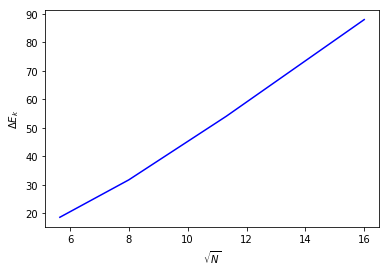

In [31]:
#Array of standard deviation for each E and sqrt(N)
DEs = [DE_kin_32, DE_kin_64, DE_kin_128, DE_kin_256]
SNs = [sqrt(32), sqrt(64), sqrt(128), sqrt(256)]

plt.plot(SNs, DEs, "b-")
plt.xlabel('$\sqrt{N}$')
plt.ylabel('$\Delta E_k$')

We plot $\dfrac{\Delta E_k}{\langle E_k \rangle}$ with large $N$ to study its scaling behavior. 

Text(0,0.5,'$\\Delta$E/<E>')

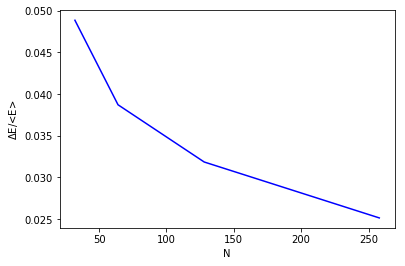

In [32]:
# Fluctuation measure
fluctuation_measure = [DE_kin_32/E_kin_32 , DE_kin_64/E_kin_64 , DE_kin_128/E_kin_128 , DE_kin_256/E_kin_256]


plt.plot(Ns, fluctuation_measure, "b-")
plt.xlabel("N")
plt.ylabel("$\Delta$E/<E>")

From above we see that $\dfrac{\Delta E_k}{\langle E_k \rangle}$ decreases with large N. This serves as a measure of the fluctuations because although the variance $\Delta E_k$ increases with large N, we are concerned with the relative fluctuations between different values of N. 

7) **Use your results for $E_k(t)$ for $t>T_{th}$ to create a histogram of the values of $E_k(t)$ which will give the probability distribution $W(E_k)$ of the kinetic energy.**

** What is the width of such a distribution and how does it depend on the number of particles?**

We can use a Gaussian distribution to fit a histogram representing the probaility distribution $W(E_k)$. We use for the mean and standard deviation the average $\langle E_k \rangle$ and variance $\Delta E_k$ of the kinetic energy, respectively.

Text(0.5,1,'$\\mu=379.382,\\ \\sigma=18.529$')

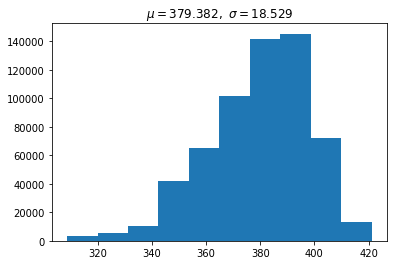

In [33]:
# Fit histogram with gaussian
(kin_32_mu, kin_32_sigma) = norm.fit(kin_32_subset[:,1])

plt.hist(kin_32_subset[:,1], bins=10)
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(kin_32_mu, kin_32_sigma))

Text(0.5,1,'$\\mu=818.225,\\ \\sigma=31.674$')

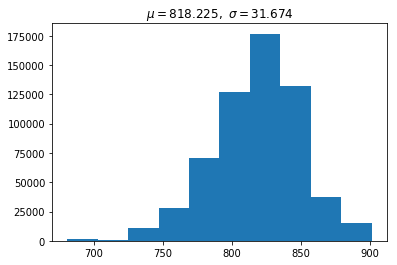

In [35]:
# Fit histogram with gaussian
(kin_64_mu, kin_64_sigma) = norm.fit(kin_64_subset[:,1])

plt.hist(kin_64_subset[:,1], bins=10)
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(kin_64_mu, kin_64_sigma))

Text(0.5,1,'$\\mu=1696.297,\\ \\sigma=54.029$')

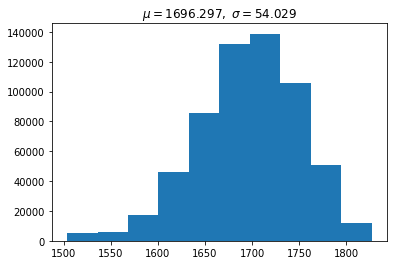

In [36]:
# Fit histogram with gaussian
(kin_128_mu, kin_128_sigma) = norm.fit(kin_128_subset[:,1])

plt.hist(kin_128_subset[:,1], bins=10)
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(kin_128_mu, kin_128_sigma))

Text(0.5,1,'$\\mu=3498.527,\\ \\sigma=87.988$')

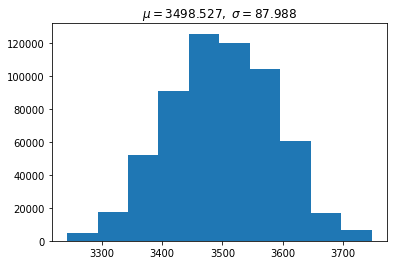

In [37]:
# Fit histogram with gaussian
(kin_256_mu, kin_256_sigma) = norm.fit(kin_256_subset[:,1])

plt.hist(kin_256_subset[:,1], bins=10)
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(kin_256_mu, kin_256_sigma))

The width of the distribution increases with the system size. The width of the distribtion represents the measure of the fluctuations relative to the mean, i.e., the variance of the kinetic energy.

8) ** Now plot the histogram for each of the four values of $N$ as a function of $E_k/N$, i.e., as a function of the kinetic energy per particle. Notice that the relative width becomes smaller and smaller as $N$ increases. **
** What happens to this distribution in the limit of $N\longrightarrow \infty$?**

Text(0.5,1,'$\\mu=11.856,\\ \\sigma=0.579$')

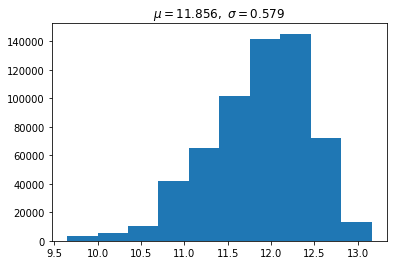

In [38]:
(kin_32_mu2, kin_32_sigma2) = norm.fit(kin_32_subset[:,1] / 32)

plt.hist(kin_32_subset[:,1] / 32, bins=10)
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(kin_32_mu2, kin_32_sigma2))

Text(0.5,1,'$\\mu=12.785,\\ \\sigma=0.495$')

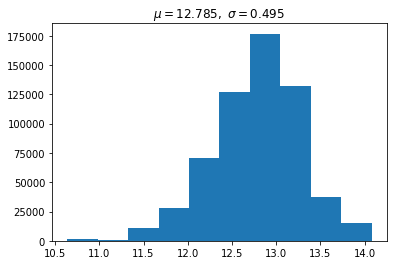

In [39]:
(kin_64_mu2, kin_64_sigma2) = norm.fit(kin_64_subset[:,1] / 64)

plt.hist(kin_64_subset[:,1] / 64, bins=10)
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(kin_64_mu2, kin_64_sigma2))

Text(0.5,1,'$\\mu=13.252,\\ \\sigma=0.422$')

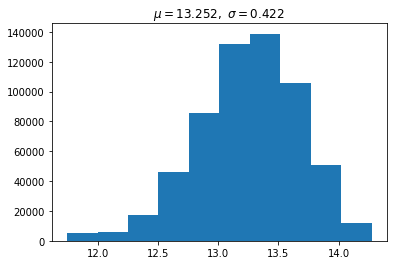

In [40]:
(kin_128_mu2, kin_128_sigma2) = norm.fit(kin_128_subset[:,1] / 128)

plt.hist(kin_128_subset[:,1] / 128, bins=10)
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(kin_128_mu2, kin_128_sigma2))

Text(0.5,1,'$\\mu=13.666,\\ \\sigma=0.344$')

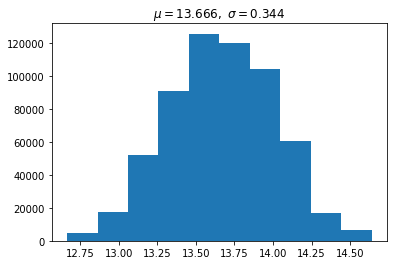

In [41]:
(kin_256_mu2, kin_256_sigma2) = norm.fit(kin_256_subset[:,1] / 256)

plt.hist(kin_256_subset[:,1] / 256, bins=10)
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(kin_256_mu2, kin_256_sigma2))

In the limit of $N\longrightarrow \infty$ the relative width approaches zero and the distribution converges onto a finite number. 